In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread_collection
import cv2
from PIL import Image

In [2]:
def compute_within_class(m,X):
    Sw = np.zeros((m.shape[1],m.shape[1]))
    for i in range(9*15):
        temp = (X[i]-m[i//9]).reshape(-1,1)
        Sw += np.dot(temp,temp.T)
    return Sw

In [3]:
def compute_between_class(m,M):
    Sb = np.zeros((m.shape[1],m.shape[1]))
    for i in range(15):
        temp = (m[i]-M).reshape(-1,1)
        Sb += np.dot(temp,temp.T)*9
    return Sb

In [64]:
def compute_mean(X):
    m = np.zeros((15,X.shape[1]))
    M = np.zeros(X.shape[1])
    for i in range(15):
        m[i] = np.mean(X[i*9:(i+1)*9,:],axis=0)
    M = np.mean(m,axis=0)
    return m,M

In [5]:
def im_concatenate(im):
    res = np.concatenate((im[:,0].reshape(new_shape),
                          im[:,1].reshape(new_shape),
                          im[:,2].reshape(new_shape),
                          im[:,3].reshape(new_shape),
                          im[:,4].reshape(new_shape)),axis=1)
    for i in range(1,5):
        temp = np.concatenate((im[:,i*5+0].reshape(new_shape),
                               im[:,i*5+1].reshape(new_shape),
                               im[:,i*5+2].reshape(new_shape),
                               im[:,i*5+3].reshape(new_shape),
                               im[:,i*5+4].reshape(new_shape)),axis=1)
        res = np.concatenate((res,temp),axis=0)
    return res

In [6]:
im_shape = (231,195)
new_shape = (115,97)
train_im = np.array(imread_collection('Yale_Face_Database/Training/*.pgm'))
test_im = np.array(imread_collection('Yale_Face_Database/Testing/*.pgm'))
train = np.zeros((train_im.shape[0],115*97))
test = np.zeros((test_im.shape[0],115*97))

In [7]:
for i in range(train_im.shape[0]):
    train[i] = cv2.resize(train_im[i],(97,115),cv2.INTER_CUBIC).reshape(-1,97*115)
for i in range(test_im.shape[0]):
    test[i] = cv2.resize(test_im[i],(97,115),cv2.INTER_CUBIC).reshape(-1,97*115)

In [8]:
train_label = []
test_label = []
for i in range(1,16):
    train_label.append([i]*9)
    test_label.append([i]*2)
train_label = np.array(train_label).reshape(-1)
test_label = np.array(test_label).reshape(-1)

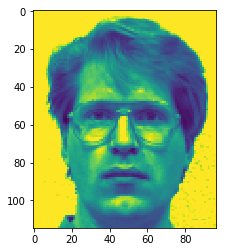

In [10]:
plt.imshow(test[0].reshape(115,97))

In [98]:
# PCA
cov = np.cov(train.transpose())
eigen_values, eigen_vectors = np.linalg.eigh(cov)
sorted_eigen_vectors = eigen_vectors[:,eigen_values.argsort()[::-1]]

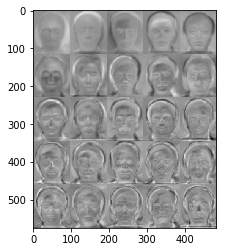

In [99]:
plt.imshow(im_concatenate(sorted_eigen_vectors[:,:25]),cmap='binary')
plt.imsave('eigenface.png',im_concatenate(sorted_eigen_vectors[:,:25]),cmap='binary')

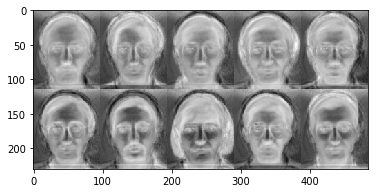

In [100]:
reconstruct = np.dot(np.dot(train[sorted(np.random.choice(135,10)),:],sorted_eigen_vectors[:,:25]),sorted_eigen_vectors[:,:25].T)

re = reconstruct[0].reshape(115,97)
for i in range(1,5):
    re = np.concatenate((re,reconstruct[i].reshape(115,97)),axis=1)
re2 = reconstruct[5].reshape(115,97)
for i in range(6,10):
    re2 = np.concatenate((re2,reconstruct[i].reshape(115,97)),axis=1)
re = np.concatenate((re,re2),axis=0)
plt.imshow(re,cmap='binary')
plt.imsave('eigenface_reconstruct.png',re,cmap='binary')

In [11]:
# LDA
m,M = compute_mean(train)
Sw = compute_within_class(m,train)
Sb = compute_between_class(m,M)
eigen_values2, eigen_vectors2 = np.linalg.eig(np.dot(np.linalg.pinv(Sw),Sb)) # Use pseudo-inverse since Sw invertible
sorted_eigen_vectors2 = eigen_vectors2[:,eigen_values2.argsort()[::-1]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


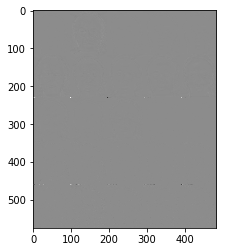

In [12]:
plt.imshow(im_concatenate(sorted_eigen_vectors2[:,:25].astype('float32')),cmap='binary')
plt.imsave('fisherface',im_concatenate(sorted_eigen_vectors2[:,:25].astype('float32')),cmap='binary')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


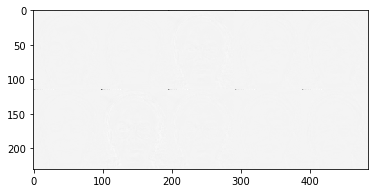

In [98]:
reconstruct2 = np.dot(np.dot(train[sorted(np.random.choice(135,10)),:],sorted_eigen_vectors2[:,:25]),sorted_eigen_vectors2[:,:25].T)

re3 = reconstruct2[0].reshape(115,97)
for i in range(1,5):
    re3 = np.concatenate((re3,reconstruct2[i].reshape(115,97)),axis=1)
re4 = reconstruct2[5].reshape(115,97)
for i in range(6,10):
    re4 = np.concatenate((re4,reconstruct2[i].reshape(115,97)),axis=1)
re4 = np.concatenate((re3,re4),axis=0)
plt.imshow(re4.astype('float32'),cmap='binary')
plt.imsave('fisherface_reconstruct.png',re4.astype('float32'),cmap='binary')

In [96]:
re4.shape

(230, 97)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


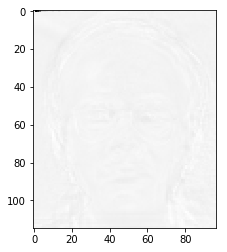

In [90]:
plt.imshow(sorted_eigen_vectors2[:,5].reshape(115,97).astype('float32'),cmap='binary')

In [45]:
sorted_eigen_vectors2[:,13].reshape(115,97)

array([[ 1.27988519e-02+3.53289555e-02j,  8.54144087e-01+0.00000000e+00j,
        -2.00605241e-01-3.86135670e-02j, ...,
         2.22650484e-04-1.62474897e-04j, -4.16848132e-05+8.04953518e-06j,
         7.20102886e-05-1.47749168e-05j],
       [-7.88118396e-04-1.15001412e-03j, -9.86127600e-04+7.15852989e-04j,
         2.80138981e-03+1.02090566e-03j, ...,
         9.59284552e-05+6.90244064e-05j, -1.36651399e-04+1.58473734e-04j,
        -1.94550191e-04+3.60180624e-04j],
       [-5.21394657e-03+8.35911357e-04j, -5.55295879e-04+2.83875737e-04j,
         1.22530248e-03+1.57933996e-03j, ...,
         6.58749801e-05-1.12102293e-06j, -2.30372128e-04-2.53490244e-04j,
         1.73427516e-04+7.33777971e-05j],
       ...,
       [-1.25226415e-04+1.62049906e-04j, -5.29294346e-04-1.46147738e-04j,
         4.17481801e-04-1.81539819e-04j, ...,
         8.43284757e-05-3.65587676e-05j, -5.46165192e-04-6.08071699e-05j,
         3.44355748e-04-3.06381200e-04j],
       [ 1.15029163e-04+1.45492066e-04j,  1.

In [14]:
np.mean(m,axis=0)

array([247.96296296, 248.17037037, 247.95555556, ..., 211.53333333,
       213.82962963, 215.59259259])

In [13]:
Sw

array([[ 70657.33333333,  69662.55555556,  67444.        , ...,
         -5364.55555556,  -5079.44444444,  -3388.11111111],
       [ 69662.55555556,  69577.33333333,  67552.44444444, ...,
         -6057.        ,  -5996.22222222,  -3843.22222222],
       [ 67444.        ,  67552.44444444,  67892.22222222, ...,
         -8192.88888889,  -7638.44444444,  -6146.        ],
       ...,
       [ -5364.55555556,  -6057.        ,  -8192.88888889, ...,
        411677.55555556, 387076.        , 363700.22222222],
       [ -5079.44444444,  -5996.22222222,  -7638.44444444, ...,
        387076.        , 381872.88888889, 354049.44444444],
       [ -3388.11111111,  -3843.22222222,  -6146.        , ...,
        363700.22222222, 354049.44444444, 344283.77777778]])

In [14]:
Sb

array([[  5825.48148148,   5650.2962963 ,   5263.77777778, ...,
         -1640.77777778,  -1825.40740741,  -3657.92592593],
       [  5650.2962963 ,   5649.74814815,   5218.57777778, ...,
         -2073.26666667,  -2295.85925926,  -3844.40740741],
       [  5263.77777778,   5218.57777778,   5111.51111111, ...,
         -1966.91111111,  -2006.57777778,  -3499.44444444],
       ...,
       [ -1640.77777778,  -2073.26666667,  -1966.91111111, ...,
        156070.04444444, 141383.26666667, 143002.11111111],
       [ -1825.40740741,  -2295.85925926,  -2006.57777778, ...,
        141383.26666667, 129646.19259259, 130700.18518519],
       [ -3657.92592593,  -3844.40740741,  -3499.44444444, ...,
        143002.11111111, 130700.18518519, 134458.81481481]])

In [87]:
eigen_values2[:100]

array([ 8.72968520e+09+0.00000000e+00j,  2.62070929e+01+0.00000000e+00j,
        1.54059103e+01+0.00000000e+00j,  8.98795859e+00+5.04146006e-01j,
        8.98795859e+00-5.04146006e-01j,  7.35497762e+00+0.00000000e+00j,
        5.65284708e+00+0.00000000e+00j,  3.62482215e+00+0.00000000e+00j,
        3.24959096e+00+0.00000000e+00j,  2.87951265e+00+0.00000000e+00j,
        2.63462476e+00+0.00000000e+00j, -2.33027090e+00+0.00000000e+00j,
        1.80987970e+00+0.00000000e+00j,  1.45925073e+00+0.00000000e+00j,
       -2.51069442e-05+5.53690780e-05j, -2.51069442e-05-5.53690780e-05j,
       -3.04489235e-06+2.22372634e-05j, -3.04489235e-06-2.22372634e-05j,
       -2.00551473e-05+9.31421746e-06j, -2.00551473e-05-9.31421746e-06j,
        2.03276529e-05+2.61649468e-06j,  2.03276529e-05-2.61649468e-06j,
        1.59605023e-05+1.26862638e-05j,  1.59605023e-05-1.26862638e-05j,
       -1.17279124e-05+1.61740887e-05j, -1.17279124e-05-1.61740887e-05j,
       -1.98597014e-05+0.00000000e+00j,  9.52337822

In [44]:
eigen_values2[eigen_values2.argsort()[::-1]][:50]

array([8.72968520e+09+0.00000000e+00j, 2.62070929e+01+0.00000000e+00j,
       1.54059103e+01+0.00000000e+00j, 8.98795859e+00+5.04146006e-01j,
       8.98795859e+00-5.04146006e-01j, 7.35497762e+00+0.00000000e+00j,
       5.65284708e+00+0.00000000e+00j, 3.62482215e+00+0.00000000e+00j,
       3.24959096e+00+0.00000000e+00j, 2.87951265e+00+0.00000000e+00j,
       2.63462476e+00+0.00000000e+00j, 1.80987970e+00+0.00000000e+00j,
       1.45925073e+00+0.00000000e+00j, 2.03276529e-05+2.61649468e-06j,
       2.03276529e-05-2.61649468e-06j, 1.59605023e-05+1.26862638e-05j,
       1.59605023e-05-1.26862638e-05j, 1.57073736e-05+1.56437663e-06j,
       1.57073736e-05-1.56437663e-06j, 1.16061328e-05+4.12758720e-06j,
       1.16061328e-05-4.12758720e-06j, 1.15666055e-05+0.00000000e+00j,
       1.14067048e-05+1.41370114e-06j, 1.14067048e-05-1.41370114e-06j,
       1.13549526e-05+1.73727648e-06j, 1.13549526e-05-1.73727648e-06j,
       1.13470481e-05+5.96905395e-07j, 1.13470481e-05-5.96905395e-07j,
      

In [60]:
train[0]

array([255., 255., 255., ..., 255., 255., 255.])

In [91]:
np.linalg.matrix_rank(Sw)

119

In [92]:
Sw.shape

(11155, 11155)